# Lecture 12 (4/22/2022)

**Announcements**



*Last time we covered:*
- Tidy data (wide / long format)

**Today's agenda:**
- Data transformations
> Part 1: logarithmic transformations
>
> Part 2: z-scoring
>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: log transformations

## Problem: highly skewed data

To get a sense of when we may need to transform our data, let's take a look at our `gapminder` dataset once again:

In [2]:
gap = pd.read_csv("https://raw.githubusercontent.com/UCSD-CSS-002/ucsd-css-002.github.io/master/datasets/gapminder.csv")

gap

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Below we plot the distribution of *population* across the countries in this dataset for the most recent year available.

What does it look like?

Text(0.5, 1.0, 'Population by country, 2007')

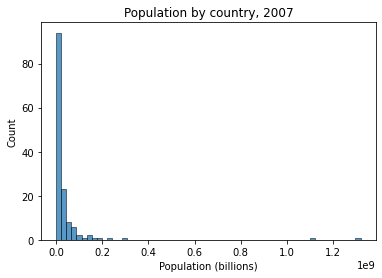

In [3]:
g = sns.histplot(
    data = gap[gap["year"] == 2007],
    x = "pop",
    bins = 60 # even with more bins the distribution is similar
)
g.set_xlabel("Population (billions)")
g.set_title("Population by country, 2007")

In [4]:
# How skewed is the data above?

gap["pop"][gap["year"] == 2007].mean() # ~44M
gap["pop"][gap["year"] == 2007].median() # ~10.5M


# ...big difference

10517531.0

**Why this is a problem?**

Most standard statistics assumes that the variables being predicted or serving as predictors are (roughly) normally distributed. Our population data above clearly isn't!

**How common is this?**

The pattern above isn't unique to population. Many other common variables tend to have similarly shaped distributions. 

*Can you think of some others?* (hint: remember Zipf's Law back in pset 1?)

## Solution: with skewed data, use log transform!

**What do we mean by log transforming?**

We want to convert our population data to a logarithmic scale rather than a linear scale.

We'll illustrate this difference below.

Histogram bins: ['-200000000.0', '0.0', '200000000.0', '400000000.0', '600000000.0', '800000000.0', '1000000000.0', '1200000000.0', '1400000000.0']


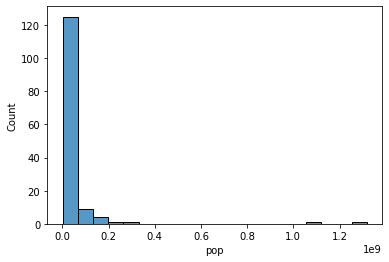

In [5]:
# Our original graph used bins scaled at a linear interval. We're printing them below. 

_ = sns.histplot(
    data = gap[gap["year"] == 2007],
    x = "pop",
    bins = 20
)

# Here's our original histogram bins: note how they increase by a fixed amount
print("Histogram bins: {}".format([str(elem) for elem in plt.xticks()[0]]))

# Can print each element minus the previous elemnt to show this
# [plt.xticks()[0][i+1] - plt.xticks()[0][i] for i in range(len(plt.xticks()[0])-1)]


In [6]:
# Step 1: let's generate logarithmic scaled bins instead of the above.


# Instead of increasing by a fixed amount (200k), they will increase by a fixed *multiple* (10) from 100k to 1B
# Use `np.logspace` for this
log_bins = np.logspace(base = 10, # specify the base (10 is default)
                       start = 5, # specify the start, which is base**start (in this case 10e5)
                       stop = 9, # specify the end, which is base**end (in this case 10e9)
                       num = 10) # specify the number of bins

[str(elem) for elem in log_bins]

# These don't increase by a fixed amount
# Can print each element minus the previous element as we did above to show this

# [log_bins[i+1] - log_bins[i] for i in range(len(log_bins)-1)]

# Instead, they increase by a fixed *multiple*
# Can print each element in log_bins *divided by* the previous element to show this

# [log_bins[i+1] / log_bins[i] for i in range(len(log_bins)-1)]

['100000.0',
 '278255.94022071257',
 '774263.6826811278',
 '2154434.6900318824',
 '5994842.503189409',
 '16681005.372000592',
 '46415888.33612773',
 '129154966.50148827',
 '359381366.3804626',
 '1000000000.0']

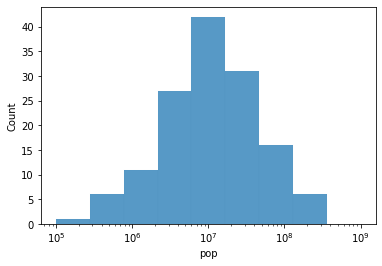

In [7]:
# Now, let's use these logarithmic intervals as the basis for our histogram bins

g = sns.histplot(
    data = gap[gap["year"] == 2007],
    x = "pop",
    bins = log_bins # This is the key change
)

# NOTE: we need to also specify that the x axis should be drawn on a logarithmic scale 
# (try graphing without this to see what happens!)
g.set_xscale('log')


Our data looks normally distributed when we plot it on a log scale. Woo hoo!

But we haven't changed the underlying data. 

Let's log transform *the data itself* so its (log) values are normally distributed.


In [8]:
# To do this, use np.log10 (np.log uses the *natural log*) 
gap['log_pop'] = np.log10(gap['pop'])

gap

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap,log_pop
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314,6.925587
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030,6.965716
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710,7.011447
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138,7.062129
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106,7.116590
...,...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306,6.964562
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786,7.029560
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960,7.057093
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623,7.076515


Now what? Let's take a look at our *log transformed* population variable.

Is it normally distributed?

Text(0.5, 0, 'Log transformed population')

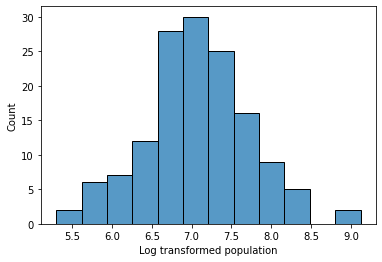

In [9]:
g = sns.histplot(data = gap[gap['year'] == 2007], x = 'log_pop')
g.set_xlabel("Log transformed population")

## Log transformations: Summary

- Statistics and modeling solutions often assume that the underlying variables are *normally distributed*

- You can count on many variables in the world being roughly normally distributed (especially with large samples!) 

- But certain types of data are **reliably not** normally distributed (ex. income, wealth, population, number of Twitter followers, number of Spotify streams, ...)

- When your data looks like the examples above (rule of thumb: roughly exponentially distributed, or has very large right skew), it's often the case that the *logarithm* of the data *is normally distributed*.

- You can check whether this is true by plotting it on a log scale as we did above. If so, consider *log transforming* your data.

Note: using the log transformed values for a variable in statistics or regression changes how you interpret your results (for example, regression coefficients on a log-transformed variable X will reflect the impact of *multiplicative* changes to X on the output variable Y). 

***

# Part 2: z-scoring

## Problem: comparing data from different distributions

To get a sense of when we may need to z-score our data, let's take a look at our `pokemon` dataset once again:

In [10]:
pk = pd.read_csv("https://raw.githubusercontent.com/UCSD-CSS-002/ucsd-css-002.github.io/master/datasets/Pokemon.csv")

pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Let's say we want to know whether each of our pokemon is going to be better off attacking opponents, or simply outlasting them. 

The `Attack` variable indicates how strong they are at attacking, while `HP` indicates how long they can withstand attacks. 

How would we evaluate which of these is stronger for each pokemon?

**Strategy 1: look at which variable is larger**

In [11]:
# "attacker" variable says whether a given pokemon has higher attack value than HP
pk['attacker'] = pk['Attack'] > pk['HP']

pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,attacker
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,True


<AxesSubplot:xlabel='Generation', ylabel='count'>

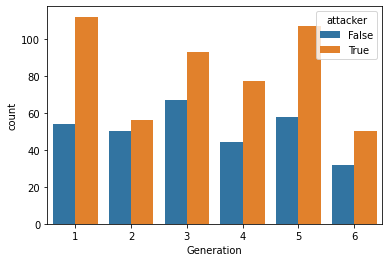

In [12]:
# We can plot this variable across our generations
sns.countplot(data = pk,
              x = 'Generation',
              hue = 'attacker'
             )

***However, there's one challenge with this strategy.***

If many pokemon have higher `Attack` than `HP` values, we can't always tell whether a pokemon has a greater *advantage* when attacking or withstanding an opponent by just looking at which value is higher. 

To see this, take a look at the distribution of `HP` and `Attack` variables below.

<AxesSubplot:xlabel='value', ylabel='Count'>

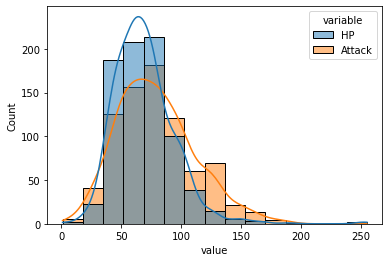

In [13]:
# For the graph below, it's easiest to switch to tidy data!
pk_tidy = pk.melt(
    id_vars = ["#", "Name", "Type 1", "Type 2", "Generation", "Legendary", "attacker"]
)
pk_tidy


sns.histplot(
    data = pk_tidy[pk_tidy['variable'].isin(["HP", "Attack"])],
    x = "value",
    hue = "variable",
    kde = True,
    bins = 15
)

In the graph above, the `Attack` distribution is shifted right and seems more spread out than the `HP` distribution, so most pokemon will likely have higher `Attack` points.

What we really want to know might be something like: *relative to the competition, does each pokemon have a more impressive `Attack` or `HP` value?*

## Solution: when comparing across (normal) distributions, try z-scores!

**What is a z-score?** 

A z-score for a given observation $x$ is the *number of standard deviations away from the mean* it is.

$Z = \dfrac{x - \mu}{\sigma}$

In [14]:
# Let's pre-compute the mean and standard deviation of each distribution in our data (Attack and HP)

mean_attack = pk['Attack'].mean() # 79
mean_hp = pk['HP'].mean() # 69

sd_attack = pk['Attack'].std() # 32.5
sd_hp = pk['HP'].std() # 25.5

# Note that these are fairly different in roughly the way we described above.

In [15]:
# Now, let's evaluate the z score for each pokemon's Attack and HP values

pk['attack_z'] = (pk['Attack'] - mean_attack) / sd_attack
pk['hp_z'] = (pk['HP'] - mean_hp) / sd_hp

pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,attacker,attack_z,hp_z
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True,-0.924328,-0.950032
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True,-0.523803,-0.362595
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,0.092390,0.420654
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,0.646964,0.420654
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,True,-0.831899,-1.185007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,True,0.646964,-0.754220
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True,2.495543,-0.754220
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,True,0.955061,0.420654
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,True,2.495543,0.420654


What do z-score distributions look like?

Text(0.5, 0, 'Z score')

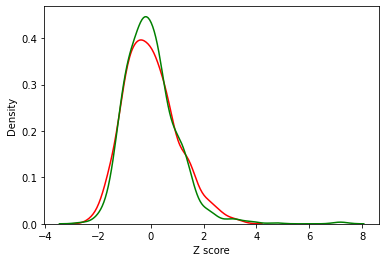

In [16]:
sns.kdeplot(data = pk, x = 'attack_z', color = 'red', alpha = 0.5)
sns.kdeplot(data = pk, x = 'hp_z', color = 'green', alpha = 0.5)

plt.xlabel("Z score")

These are much more comparable!

Now, we can ask which pokemon have a higher *z-scored* `Attack` relative to their *z-scored* `HP`

In [17]:
pk['z_attacker'] = pk['attack_z'] > pk['hp_z']

pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,attacker,attack_z,hp_z,z_attacker
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True,-0.924328,-0.950032,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True,-0.523803,-0.362595,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,0.092390,0.420654,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,0.646964,0.420654,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,True,-0.831899,-1.185007,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,True,0.646964,-0.754220,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True,2.495543,-0.754220,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,True,0.955061,0.420654,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,True,2.495543,0.420654,True


<AxesSubplot:xlabel='Generation', ylabel='count'>

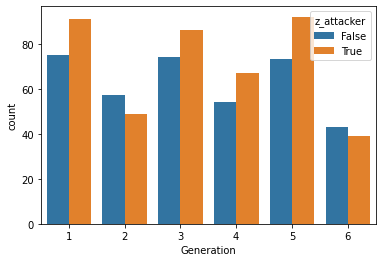

In [18]:
# We can plot this variable across our generations
sns.countplot(data = pk,
              x = 'Generation',
              hue = 'z_attacker'
             )

# Note it's a little less dramatic than our previous plot!

This plot provides a little more balanced picture than our previous one. 

We can also use the z-scores to compare each pokemon's `Attack` and `HP` in a more fine-grained way:

In [19]:
# Let's see which pokemon have the largest difference (in standard deviation units) between their `Attack` and `HP`
pk['attack_diff_normalized'] = pk['attack_z'] - pk['hp_z']

pk.nlargest(10, 'attack_diff_normalized')


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,attacker,attack_z,hp_z,z_attacker,attack_diff_normalized
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,True,3.111736,-0.754220,True,3.865956
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,True,2.495543,-0.754220,True,3.249763
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False,True,0.338868,-2.673179,True,3.012047
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,True,2.187446,-0.754220,True,2.941666
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False,True,2.649591,-0.205945,True,2.855537
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,True,3.265784,0.420654,True,2.845131
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False,True,2.649591,-0.049296,True,2.698887
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False,True,2.187446,-0.362595,True,2.550042
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False,True,2.341495,-0.166783,True,2.508278
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,True,2.187446,-0.166783,True,2.354230


We can plot this distribution and use it to evaluate the relative strength of a given pokemon's `Attack`

Text(0.5, 0, 'Normalized Attack - HP')

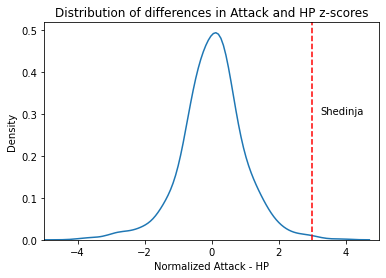

In [20]:
g = sns.kdeplot(data = pk,
            x = 'attack_diff_normalized'
           )


g.axvline(pk[pk['Name'] == 'Shedinja']['attack_diff_normalized'].iloc[0], # value to draw the line at
            color = 'red', # color
            ls = '--' # `linestyle`: '-', ':'
           )

g.text(3.25, 0.3, "Shedinja")

g.set_xlim(-5, 5)
g.set_title("Distribution of differences in Attack and HP z-scores")
g.set_xlabel("Normalized Attack - HP")

## Z-scores: Summary

- Sometimes for analysis purposes, you'll want to compare variables that are measured on different scales or show differences in the underlying distribution (ex. how to compare SAT and ACT scores?)

- To make these comparisons, it's often easier to convert the data to a similar scale for comparison.

- A z-score converts each data point to a *number of standard deviations above or below the mean*, which means you can more easily compare two scores that are otherwise very different or use these scores as the basis for regression or other analyses.
